In [244]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

<IPython.core.display.Javascript object>

In [245]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [246]:
import joblib

import pandas as pd
import seaborn as sns

<IPython.core.display.Javascript object>

In [247]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", 100)

<IPython.core.display.Javascript object>

In [248]:
clean_ = joblib.load("data/clean_exe_files_features.gz")

<IPython.core.display.Javascript object>

In [249]:
infected_ = joblib.load("data/infected_exe_files_features.gz")

<IPython.core.display.Javascript object>

In [250]:
cln = pd.DataFrame(clean_)

<IPython.core.display.Javascript object>

In [251]:
inf = pd.DataFrame(infected_)

<IPython.core.display.Javascript object>

In [252]:
cln_columns_90 = cln.loc[:, cln.notnull().mean() > 0.90].columns

<IPython.core.display.Javascript object>

In [253]:
inf_columns_90 = inf.loc[:, inf.notnull().mean() > 0.90].columns

<IPython.core.display.Javascript object>

In [254]:
len(cln_columns_90), len(inf_columns_90), len(
    set(cln_columns_90).intersection(set(inf_columns_90))
)

(55, 55, 55)

<IPython.core.display.Javascript object>

In [255]:
columns = list(set(cln_columns_90).intersection(set(inf_columns_90)))

<IPython.core.display.Javascript object>

## Add target columns

In [256]:
cln["target"] = 0
inf["target"] = 1

<IPython.core.display.Javascript object>

## We selected 55 columns out of generated features



In [257]:
df = pd.concat([cln[columns + ["target"]], inf[columns + ["target"]]])

<IPython.core.display.Javascript object>

## EDA - exploratory data analysis
What has been done
1. remove nan columns and rows. 
2. there are many columns that have very few unique values. 
    1. find most popular value percentage (can be translated into dummy variable) - for improvement.
3. There are extreme values for some columns
    1. drop max values 
    2. cap max values
    
    

In [258]:
columns.remove("file_name")

<IPython.core.display.Javascript object>

In [259]:
df.drop("file_name", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [260]:
df = df.dropna()

<IPython.core.display.Javascript object>

In [266]:
df.to_csv("data/all_data.csv", index=False)

<IPython.core.display.Javascript object>

In [41]:
df.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
generated_check_sum,16414.000,579890.495,597329.389,5455.000,30260.730,56973.150,181479.500,447378.500,745314.750,1704800.350,3260532.990,4291281.000
sec_rawptr_data,16414.000,181334.077,362184.612,0.000,0.000,0.000,0.000,36864.000,237568.000,641024.000,1998648.320,3941888.000
size_initdata,16414.000,1111162.241,48838713.552,0.000,1024.000,2048.000,8192.000,73728.000,214528.000,684032.000,2974520.320,4041874473.000
check_sum,16414.000,6361448.162,127266103.323,0.000,0.000,0.000,0.000,0.000,342414.250,1247521.250,3931308.010,4278190208.000
datadir_IMAGE_DIRECTORY_ENTRY_RESOURCE_size,16414.000,90022.797,227330.531,0.000,0.000,124.400,1544.000,16904.000,92249.000,372016.100,837580.000,8860672.000
pe_warnings,16414.000,0.236,0.424,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
pe_minorlink,16414.000,7.241,12.978,0.000,0.000,0.000,0.000,0.000,10.000,34.000,50.000,255.000
sec_rawsize_data,16414.000,18102.725,88130.802,0.000,0.000,0.000,0.000,1536.000,9728.000,76467.200,226816.000,3851776.000
debug_size,16414.000,13.902,52.025,0.000,0.000,0.000,0.000,0.000,28.000,84.000,84.000,4152.000
number_of_bound_import_symbols,16414.000,0.008,0.090,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000


<IPython.core.display.Javascript object>

In [42]:
n_unique = []
for col in columns + ["target"]:
    n_unique.append([col, df[col].nunique()])

<IPython.core.display.Javascript object>

In [43]:
df.shape[0]

16414

<IPython.core.display.Javascript object>

In [44]:
temp = pd.DataFrame(data=n_unique, columns=["col_name", "unique_count"])

<IPython.core.display.Javascript object>

In [45]:
temp["unique_value_proportion"] = temp.unique_count / df.shape[0]

<IPython.core.display.Javascript object>

In [51]:
temp[temp.unique_value_proportion > 0.5]

,col_name,unique_count,unique_value_proportion
0,generated_check_sum,16079,0.980
11,sec_vasize_text,8577,0.523
21,virtual_size,9146,0.557
22,sec_entropy_text,10002,0.609
29,compile_date,9421,0.574
31,iat_rva,8457,0.515
39,sec_entropy_rsrc,10585,0.645
43,sec_va_execsize,10629,0.648


<IPython.core.display.Javascript object>

# Modeling

## Baseline model with XGBoost

In [204]:
feature_columns = temp[temp.unique_value_proportion > 0].col_name.values.tolist()

<IPython.core.display.Javascript object>

In [206]:
if "file_size" not in feature_columns:
    feature_columns.append("file_size")
if "target" in feature_columns:
    feature_columns.remove("target")

<IPython.core.display.Javascript object>

In [207]:
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [208]:
X_train, X_test, y_train, y_test = train_test_split(df[feature_columns], df["target"])

<IPython.core.display.Javascript object>

In [209]:
import xgboost
from xgboost import XGBClassifier

<IPython.core.display.Javascript object>

In [210]:
bst = XGBClassifier(
    n_estimators=15, max_depth=5, learning_rate=0.5, objective="binary:logistic"
)
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred = bst.predict(X_test)

<IPython.core.display.Javascript object>

In [211]:
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
)

<IPython.core.display.Javascript object>

In [213]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
pd.DataFrame(
    cm,
    columns=["0_predict", "1_predict"],
    index=["0_true", "1_true"],
)

,0_predict,1_predict
0_true,556,68
1_true,38,3442


<IPython.core.display.Javascript object>

In [214]:
FPR = fp / (tn + fp)
FPR

0.10897435897435898

<IPython.core.display.Javascript object>

In [215]:
f1_score(y_test, y_pred), accuracy_score(y_test, y_pred), precision_score(
    y_test, y_pred
), recall_score(y_test, y_pred)

(0.9848354792560801,
 0.9741715399610137,
 0.9806267806267807,
 0.9890804597701149)

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

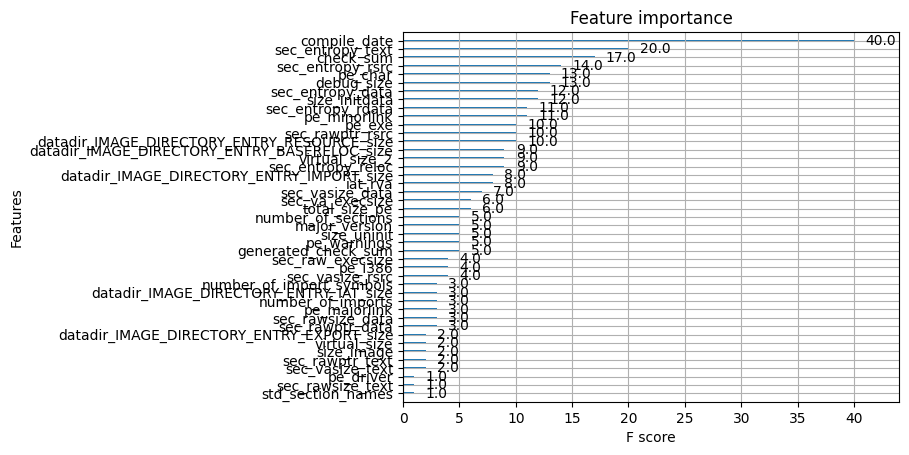

<IPython.core.display.Javascript object>

In [216]:
xgboost.plot_importance(bst)

In [233]:
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [234]:
parameters = {
    "n_estimators": [*range(14, 18)],
    "max_depth": [*range(4, 8)],
    "learning_rate": [0.1, 0.2, 0.5, 1],
}

<IPython.core.display.Javascript object>

In [235]:
bst = XGBClassifier()

<IPython.core.display.Javascript object>

In [236]:
clf = GridSearchCV(bst, parameters)

<IPython.core.display.Javascript object>

In [237]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'max_depth': [4, 5, 6, 7],
                         'n_estimators': [14, 15, 16, 17]})

<IPython.core.display.Javascript object>

In [238]:
y_pred = clf.best_estimator_.predict(X_test)

<IPython.core.display.Javascript object>

In [239]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
pd.DataFrame(
    cm,
    columns=["0_predict", "1_predict"],
    index=["0_true", "1_true"],
)

,0_predict,1_predict
0_true,573,51
1_true,37,3443


<IPython.core.display.Javascript object>

In [240]:
FPR = fp / (tn + fp)
FPR

0.08173076923076923

<IPython.core.display.Javascript object>

In [241]:
f1_score(y_test, y_pred), accuracy_score(y_test, y_pred), precision_score(
    y_test, y_pred
), recall_score(y_test, y_pred)

(0.9873817034700314, 0.9785575048732943, 0.9854035489410418, 0.989367816091954)

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

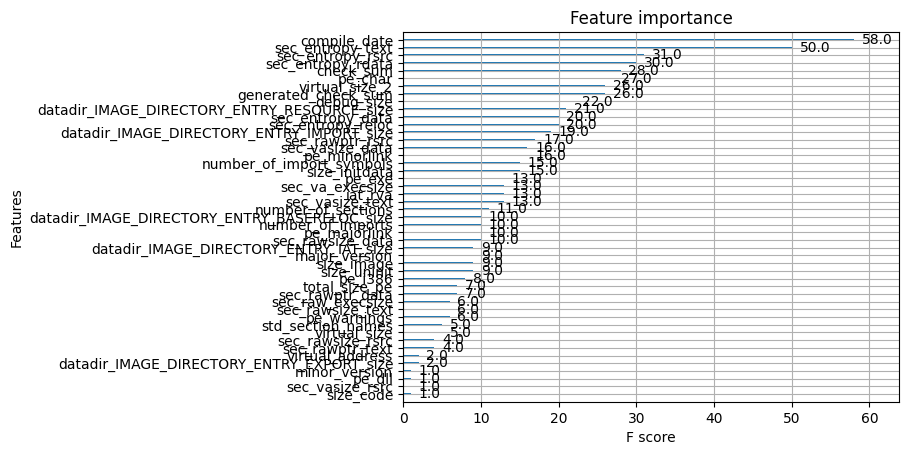

<IPython.core.display.Javascript object>

In [242]:
xgboost.plot_importance(clf.best_estimator_)

In [243]:
clf.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=16, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<IPython.core.display.Javascript object>